<a href="https://colab.research.google.com/github/sethkipsangmutuba/Regression-for-Data-Scientists/blob/main/a1.Regression_Seth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

#A). Linear Regression
Linear regression is a statistical method used to model the relationship between a dependent variable $y$ and one or more independent variables $X$. The objective is to find the best-fitting linear equation that describes how $y$ changes as $X$ varies.

The equation for simple linear regression can be represented as:

$$
y = \beta_0 + \beta_1 X + \epsilon
$$

Where:

- $y$ is the dependent variable.
- $X$ is the independent variable.
- $\beta_0 \$ is the intercept of the regression line.

- $\beta_1 \$  is the coefficient slope of the independent variable.

- $\epsilon \$ represents the error term (the difference between the observed and predicted values).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set a random seed for reproducibility
np.random.seed(42)

##  Data Generation

The provided code generates synthetic data for $n$ samples as follows:

1. A random seed is set for reproducibility using `np.random.seed(42)`.
2. The independent variable $X$ is generated as random values uniformly distributed between 0 and 100:

$$
X \sim \text{Uniform}(0, 100)
$$

3. The dependent variable $y$ is created using a linear relationship with added Gaussian noise:

$$
y = 3X + 5 + \epsilon
$$

Here, $\epsilon$ is normally distributed noise with mean 0 and standard deviation 5:

$$
\epsilon \sim N(0, 5).
$$


In [ ]:
# Generate synthetic data
n_samples = 1000
X = np.random.rand(n_samples) * 100  # Independent variable (0 to 100)
# Create a dependent variable with a strong linear relationship (y = 3X + 5) and some noise
y = 3 * X + 5 + np.random.normal(0, 5, n_samples)  # Add noise with a small standard deviation

# Create a DataFrame
data = pd.DataFrame({'X': X, 'y': y})
data

,X,y
0,37.454012,118.250541
1,95.071431,283.537570
2,73.199394,226.499172
3,59.865848,187.650474
4,15.601864,54.604544
...,...,...
995,9.158207,25.874509
996,91.731358,277.135227
997,13.681863,45.860405
998,95.023735,287.924695


## Data Splitting

The dataset is divided into training and testing sets using:

$$
(X_{\text{train}}, X_{\text{test}}, y_{\text{train}}, y_{\text{test}}) = \text{train_test_split},(X, y, \text{test_size}=0.2)
$$

where

- $X$ represents the feature dataset.
- $y$ represents the target variable.

- **Training Set:** 80% of the data is used to fit the model.
- **Testing Set:** 20% of the data is reserved to evaluate the model's performance.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.2, random_state=42)

In [ ]:
X_train

,X
29,4.645041
535,94.476573
695,61.062004
557,2.878268
836,91.484590
...,...
106,41.038292
270,80.936116
860,77.552762
435,70.096913


In [ ]:
X_test

,X
521,38.089086
737,81.659944
740,46.267979
660,35.609673
411,95.006197
...,...
408,90.538198
332,1.439349
208,0.506158
613,8.175903


In [ ]:
y_train

,y
29,14.462087
535,281.870538
695,191.427415
557,12.122454
836,280.947535
...,...
106,131.034518
270,244.680533
860,237.779382
435,221.529450


In [ ]:
y_test

,y
521,124.227469
737,253.133890
740,149.909104
660,115.143424
411,283.348463
...,...
408,279.364853
332,13.668385
208,5.413654
613,30.210386


##Model Fitting

A linear regression model is instantiated and fitted to the training data:

$$
\text{model.fit}(X_{\text{train}}, y_{\text{train}})
$$

The fitting process estimates the coefficients $\beta_0 $ (intercept) and $ \beta_1$ (slope) by minimizing the residual sum of squares (RSS):

$$
\text{RSS} = \sum (y_{\text{observed}} - y_{\text{predicted}})^2
$$

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

##Predictions and Evaluation

Predictions are made on the testing set:

$$
y_{\text{pred}} = \text{model.predict}(X_{\text{test}})
$$

In [ ]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([119.88154192, 250.21090189, 144.34628554, 112.46510966,
       290.13227706, 295.93774677, 144.30289227, 265.00673187,
        25.60408616, 161.1301857 , 256.88088385, 236.65204195,
       165.26601829,  70.24235545,  41.17104677,  31.52663917,
       272.16811056,  37.09029537,  99.19174068,  80.80206201,
       236.96553368, 198.93368052,  11.39980768,  87.73094076,
       170.08680034, 222.04950918, 196.31267348, 211.86454098,
        60.2203407 , 275.16329366, 195.91880348, 296.62920846,
        68.56995632, 300.94511668,  36.0940505 , 271.29500254,
        89.69676705, 195.41245336,  13.88561199, 103.26225081,
       131.4602581 , 162.30938074,  13.53221298,  15.27680076,
        31.47846107, 200.36680872, 133.13935357,  89.2813621 ,
        30.28237269, 114.34872313, 159.69406863,  72.34570585,
       302.09466827, 153.15134774, 115.53561649, 187.67839353,
        88.76906118,  12.10653026, 175.94202807, 246.09919452,
       236.27012684, 184.79341448,  74.34103195,  54.05

The performance of the model is evaluated using two metrics:

### Mean Squared Error (MSE):

$$
\text{MSE} = \frac{1}{n} \sum (y_{\text{test}} - y_{\text{pred}})^2
$$

### Coefficient of Determination (R² Score):

$$
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
$$

Where TSS (Total Sum of Squares) is given by:

$$
\text{TSS} = \sum (y_{\text{test}} - \bar{y})^2
$$

Here, $\bar{y}$ is the mean of the observed data $y_{\text{test}}$.


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print coefficients
intercept = model.intercept_
coefficient = model.coef_[0]

##Results Interpretation

After fitting the model, the following metrics are computed and printed:

- **Intercept:** $\beta_0 $, the value of $y$ when $X = 0$.
- **Coefficient:** $\beta_1$, the average change in $y$ for a one-unit increase in $X$.
- **Mean Squared Error:** Indicates the average squared difference between observed and predicted values; lower values suggest a better fit.
- **R² Score:** Ranges from 0 to 1, where values closer to 1 indicate a better explanatory power of the model.

In [ ]:
# Print metrics
print('Intercept:', intercept)
print('Coefficient:', coefficient)
print('Mean Squared Error:', mse)
print('R² Score:', r2)

Intercept: 5.949286463741146
Coefficient: 2.9912047892795806
Mean Squared Error: 21.434311664543834
R² Score: 0.9971428964125943


The linear regression model exhibits an intercept of approximately 5.95, suggesting that when the independent variable is zero, the dependent variable is expected to be around this value. The coefficient of approximately 2.99 indicates a strong positive relationship; for each unit increase in the independent variable, the dependent variable increases by nearly 3 units. With an $R^2$ score of 0.997, the model demonstrates an exceptional fit, explaining about 99.7% of the variance in the dependent variable. The mean squared error of 21.43 reflects a minimal discrepancy between predicted and actual values, confirming the model's high accuracy.


##Visualization

The results are visualized using a scatter plot of actual vs. predicted values:

- The blue points represent the actual observations.
- The red points indicate the predicted values.
- The green line represents the regression line fitted to the data.

Metrics are annotated on the plot in the lower-right corner for quick reference, enhancing the understanding of the model's performance visually.

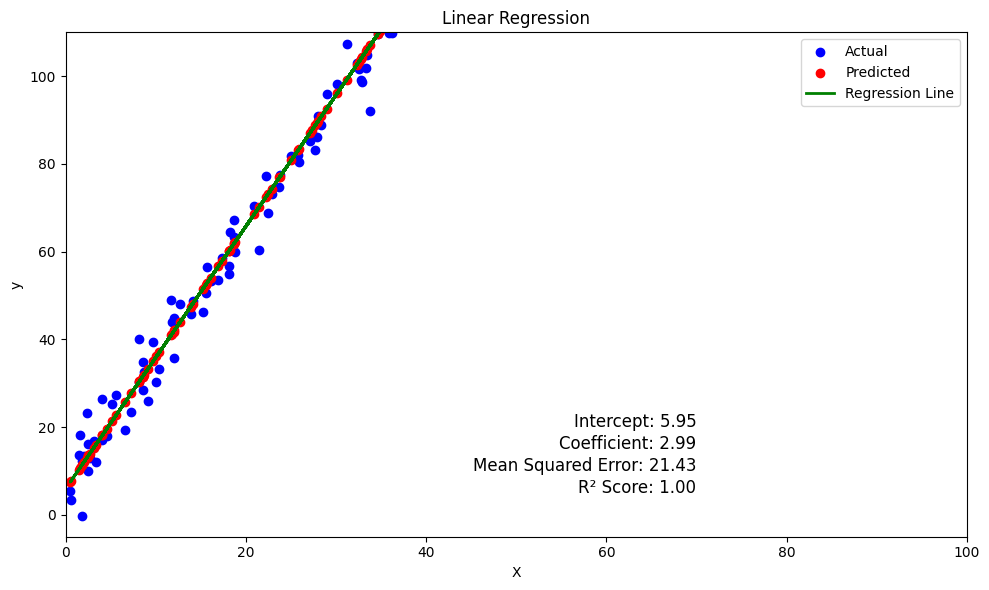

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

# Annotate metrics on the plot
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Adding metrics to the lower-right corner
plt.text(70, 20, f'Intercept: {intercept:.2f}', fontsize=12, color='black', ha='right')
plt.text(70, 15, f'Coefficient: {coefficient:.2f}', fontsize=12, color='black', ha='right')
plt.text(70, 10, f'Mean Squared Error: {mse:.2f}', fontsize=12, color='black', ha='right')
plt.text(70, 5, f'R² Score: {r2:.2f}', fontsize=12, color='black', ha='right')

plt.xlim(0, 100)  # Set x-axis limit for better metric placement
plt.ylim(-5, 110)  # Set y-axis limit for better metric placement

plt.tight_layout()
plt.show()

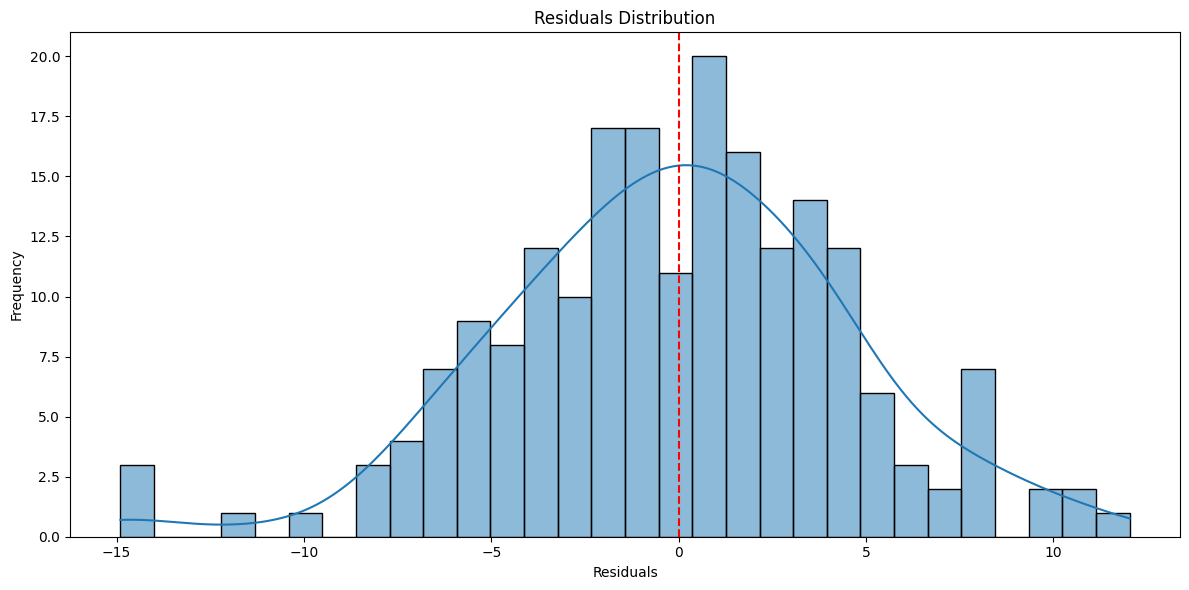

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Residuals
residuals = y_test - y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='r', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## B). Polynomial Regression

Polynomial regression is an extension of linear regression that models the relationship between a dependent variable $y$ and an independent variable \(X\) as an $n^{th}$  degree polynomial:

$$
y = \beta_0 + \beta_1X + \beta_2X^2 + \ldots + \beta_nX^n + \epsilon
$$

Where:
- $y$ is the dependent variable.
- $X$ is the independent variable.
- $\beta_0$ is the intercept (constant term).
- $\beta_1$, $\beta_2$, $\ldots$, $\beta_n$ are the coefficients for the polynomial terms.
- $\epsilon$ represents the error term (the difference between the observed and predicted values).


## Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

##Generating Polynomial Features

In polynomial regression, if the degree is set to 2 (as in this case), the model tries to fit the data using a quadratic polynomial of the form:

$$
y = \beta_0 + \beta_1 X + \beta_2 X^2
$$

Where:

- $y$ is the dependent variable.
- $X$ is the independent variable.
- $\beta_0$, $\beta_1$, $\beta_2$ are the regression coefficients (to be learned by the model).

Increasing the degree to higher values (e.g., degree = 3, 4, etc.) would add more terms like $X^3$, $X^4$, $\dots$, making the regression model more flexible, but also potentially prone to overfitting.


In [ ]:
# Generate polynomial features
degree = 2  # Change this to explore different degrees of polynomial
poly_features = PolynomialFeatures(degree=degree)

# Transform the input data to polynomial features
X_poly = poly_features.fit_transform(X.reshape(-1, 1))
X_poly

array([[1.00000000e+00, 3.74540119e+01, 1.40280301e+03],
       [1.00000000e+00, 9.50714306e+01, 9.03857692e+03],
       [1.00000000e+00, 7.31993942e+01, 5.35815131e+03],
       ...,
       [1.00000000e+00, 1.36818631e+01, 1.87193378e+02],
       [1.00000000e+00, 9.50237354e+01, 9.02951029e+03],
       [1.00000000e+00, 4.46005773e+01, 1.98921150e+03]])

## Splitting the data

In [ ]:
# Split the polynomial data into training and testing sets
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

##  Regularization Techniques

In the models employed, regularization techniques help prevent overfitting, especially when dealing with polynomial features:

###1. Ridge Regression

Ridge regression adds an $L2$ penalty to the loss function:

$$
\text{Loss}_{\text{Ridge}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2
$$

Where:
- $\lambda$ is the regularization parameter that controls the amount of shrinkage.

### 2. Lasso Regression

Lasso regression adds an $L1$ penalty:

$$
\text{Loss}_{\text{Lasso}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j|
$$

This method can reduce some coefficients to zero, effectively performing variable selection.

### 3. ElasticNet

ElasticNet combines both $L1$ and $L2$ penalties:

$$
\text{Loss}_{\text{ElasticNet}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda_1 \sum_{j=1}^{p} |\beta_j| + \lambda_2 \sum_{j=1}^{p} \beta_j^2
$$

Where $\lambda_1$ and $\lambda_2$ are the regularization parameters for the $L1$ and $L2$ penalties, respectively.

## 4. Random Forest Regressor

Random Forest regression is an ensemble method that builds multiple decision trees and merges them together to get a more accurate and stable prediction. The prediction from a Random Forest model is generally the average of predictions from all individual trees:

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^{T} \hat{y}_t
$$

Where $T$ is the total number of trees and $\hat{y}_t$ is the prediction from tree $t$.

## 5. Kernel Density Estimate (KDE)

The Kernel Density Estimate is a non-parametric way to estimate the probability density function of a random variable. The KDE of a variable $x$ can be expressed as:

$$
\hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)
$$

Where:
- $n$ is the number of data points.
- $h$ is the bandwidth parameter that controls the smoothness of the resulting density curve.
- $K$ is the kernel function, often chosen to be Gaussian.

In [ ]:
# Create a dictionary of models to evaluate
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "RandomForest": RandomForestRegressor()
}

## Model Evaluation Metrics

### 1. Mean Squared Error (MSE)

MSE is a measure of the average squared difference between the observed actual outcomes and the outcomes predicted by the model:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:
- $n$ is the number of observations.
- $y_i$ is the actual value.
- $\hat{y}_i$ is the predicted value.

A lower MSE indicates a better fit of the model.

### 2. Coefficient of Determination $R^2$

The $R^2$ score indicates the proportion of the variance in the dependent variable that can be explained by the independent variables in the model. It is calculated as:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Where:
- $\bar{y}$ is the mean of the actual values.

An $R^2$ value closer to 1 indicates that a larger proportion of variance is explained by the model.

In [ ]:
# Fit and evaluate each model
for model_name, model in models.items():
    model.fit(X_poly_train, y_poly_train)  # Fit the model to the training data
    y_poly_pred = model.predict(X_poly_test)  # Make predictions

    # Evaluate the model
    mse = mean_squared_error(y_poly_test, y_poly_pred)
    r2 = r2_score(y_poly_test, y_poly_pred)

   # Print metrics
print('Mean Squared Error:', mse)
print('R² Score:', r2)


Mean Squared Error: 36.631874001869065
R² Score: 0.9951171252773533


## Visualization

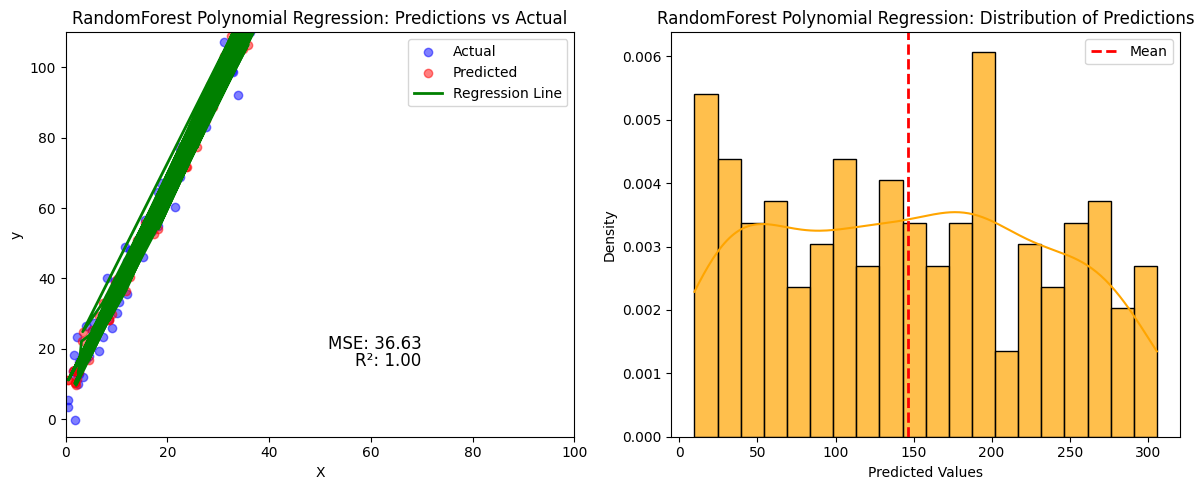

In [ ]:
    # Create a figure for plotting
    plt.figure(figsize=(12, 5))

    # First plot: Predictions vs Actual
    plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
    plt.scatter(X_poly_test[:, 1], y_poly_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_poly_test[:, 1], y_poly_pred, color='red', label='Predicted', alpha=0.5)
    plt.plot(X_poly_test[:, 1], y_poly_pred, color='green', linewidth=2, label='Regression Line')
    plt.title(f'{model_name} Polynomial Regression: Predictions vs Actual')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.xlim(0, 100)  # Set x-axis limit for better metric placement
    plt.ylim(-5, 110)  # Set y-axis limit for better metric placement

    # Annotate metrics on the plot
    plt.text(70, 20, f'MSE: {mse:.2f}', fontsize=12, color='black', ha='right')
    plt.text(70, 15, f'R²: {r2:.2f}', fontsize=12, color='black', ha='right')

    # Second plot: Distribution of predicted values
    plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
    sns.histplot(y_poly_pred, bins=20, kde=True, color='orange', alpha=0.7, edgecolor='black', stat='density')
    plt.axvline(x=np.mean(y_poly_pred), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.title(f'{model_name} Polynomial Regression: Distribution of Predictions')
    plt.xlabel('Predicted Values')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()

#C). Logistic Regression

Logistic regression is a statistical method used for binary classification. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that a given input belongs to a certain category (e.g., 0 or 1). The output of logistic regression is a value between 0 and 1, interpreted as a probability.

The logistic regression model is formulated as follows:

### **Logit Function**
The relationship between the independent variable $X$ and the log-odds of the dependent variable $y$ is expressed as:

$$
\text{logit}(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 X
$$

where:
- $p$ is the probability that $y = 1$.
- $\beta_0$ is the intercept.
- $\beta_1$ is the coefficient for the independent variable $X$.

### **Probability Prediction**
The probability $p$ can be derived from the logit function using the inverse logistic function:

$$
p = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

where $e$ is the base of the natural logarithm.

### **Cost Function**
The cost function for logistic regression is defined using the **negative log-likelihood** function, which measures how well the model fits the data:

$$
J(\beta) = -L(\beta) = -\sum_{i=1}^{n} \left[y_i \log(p_i) + (1 - y_i) \log(1 - p_i)\right]
$$

Where:
- $J(\beta)$ is the cost function (or loss function).
- $y_i$ is the actual binary outcome for observation $i$ (0 or 1).
- $p_i$ is the predicted probability that observation $i$ belongs to the positive class.

The goal is to find the coefficients $\beta$ that minimize the cost function $J(\beta)$. In this context, the likelihood function $L(\beta)$ can also be expressed mathematically as:

$$
L(\beta) = \prod_{i=1}^{n} p_i^{y_i} (1 - p_i)^{1 - y_i}
$$

In this equation:
- $n$ is the total number of observations.
- The likelihood function $L(\beta)$ represents the probability of observing the given outcomes $y_i$ for all observations, given the parameters $\beta$.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for logistic regression
n_samples = 1000
X = np.random.rand(n_samples) * 100  # Independent variable (0 to 100)

# Create a dependent binary variable using a logistic function
y_prob = 1 / (1 + np.exp(-0.1 * (X - 50)))  # Logistic function for probabilities
y = (np.random.rand(n_samples) < y_prob).astype(int)  # Generate binary outcomes based on probabilities

In [ ]:
y_prob

array([0.22190508, 0.98909041, 0.910515  , 0.72841284, 0.0310741 ,
       0.03106683, 0.01190096, 0.97495608, 0.73324517, 0.88901566,
       0.00821003, 0.99097865, 0.96525734, 0.05332206, 0.0398583 ,
       0.04046719, 0.12372945, 0.56157691, 0.3361386 , 0.11029723,
       0.75371575, 0.02646627, 0.11119885, 0.20810574, 0.39190774,
       0.94540957, 0.04727872, 0.53552613, 0.71588606, 0.01060786,
       0.74563169, 0.03575143, 0.01274884, 0.98889129, 0.99058807,
       0.9562268 , 0.12413282, 0.01757962, 0.86322407, 0.35469265,
       0.02232178, 0.48794461, 0.00941385, 0.98358816, 0.08224709,
       0.83551416, 0.13205736, 0.55000236, 0.6146978 , 0.04103397,
       0.99094952, 0.93998832, 0.98781138, 0.98107701, 0.72690971,
       0.98549631, 0.0160625 , 0.04564371, 0.01048025, 0.14846433,
       0.24726975, 0.0922464 , 0.96399315, 0.19271463, 0.10059283,
       0.60514771, 0.02683732, 0.95355684, 0.01400146, 0.99237652,
       0.93833831, 0.04684902, 0.00707015, 0.95909015, 0.88781

In [ ]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,

### Reading to a DataFrame

In [ ]:
# Create a DataFrame
data = pd.DataFrame({'X': X, 'y': y})

# Check the class distribution
print(data['y'].value_counts())

y
0    510
1    490
Name: count, dtype: int64


## Splitting Data

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.2, random_state=42)

### fit a logistic regression model

In [ ]:
# Create and fit a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

### Predictions

In [ ]:
# Make predictions
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_proba

array([0.23978401, 0.95780163, 0.41309808, 0.1982611 , 0.98825002,
       0.99026806, 0.41275294, 0.97360194, 0.01410362, 0.54971253,
       0.96581225, 0.93567929, 0.58302565, 0.05827544, 0.02328545,
       0.01707697, 0.97901374, 0.02042707, 0.13791705, 0.08046344,
       0.93629555, 0.80843092, 0.00889648, 0.09896932, 0.62090163,
       0.90009496, 0.79475854, 0.86577528, 0.04264126, 0.98094058,
       0.79264256, 0.99048429, 0.0553361 , 0.99173032, 0.01978317,
       0.97841702, 0.1048716 , 0.78989869, 0.00964519, 0.15457695,
       0.31562205, 0.55926972, 0.00953506, 0.0100911 , 0.01705046,
       0.8156077 , 0.32764108, 0.10359903, 0.01640506, 0.20826811,
       0.53802396, 0.06218021, 0.99203398, 0.48443567, 0.21476234,
       0.74470328, 0.10204844, 0.00910328, 0.6649624 , 0.95199951,
       0.93492102, 0.72629449, 0.06610905, 0.0351009 , 0.02393812,
       0.52243101, 0.7413866 , 0.03329648, 0.93625244, 0.84556038,
       0.9257468 , 0.04540171, 0.02848384, 0.12628435, 0.96011

In [ ]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0])

---

### **Model Evaluation Metrics**

To assess the performance of a logistic regression model, we use several metrics:

1. **Confusion Matrix**: The confusion matrix summarizes the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

   $$
   \begin{array}{|c|c|c|}
   \hline
   & \text{Predicted: 0} & \text{Predicted: 1} \\
   \hline
   \text{Actual: 0} & TN & FP \\
   \hline
   \text{Actual: 1} & FN & TP \\
   \hline
   \end{array}
   $$

2. **Accuracy**: The overall accuracy of the model is calculated as:

   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$

3. **Precision**: Precision indicates how many of the positively predicted cases were actually positive:

   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$

4. **Recall (Sensitivity)**: Recall measures how many actual positive cases were identified by the model:

   $$
   \text{Recall} = \frac{TP}{TP + FN}
   $$

5. **F1 Score**: The F1 score is the harmonic mean of precision and recall:

   $$
   \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
   $$

6. **ROC AUC Score**: The ROC AUC score quantifies the model's ability to discriminate between classes, where:
   - The **ROC Curve** plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
   - The **AUC** (Area Under the Curve) value ranges from 0 to 1, with a higher value indicating better model performance.

   $$
   \text{AUC} = \int_{0}^{1} TPR(FPR) \, d(FPR)
   $$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import seaborn as sns


# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc:.2f}")

Confusion Matrix:
[[90 16]
 [15 79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       106
           1       0.83      0.84      0.84        94

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.85      0.84      0.85       200

ROC AUC Score: 0.91


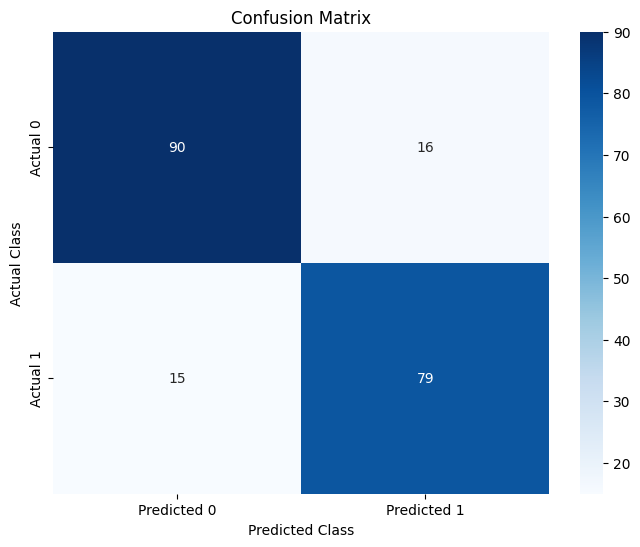

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns

## Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


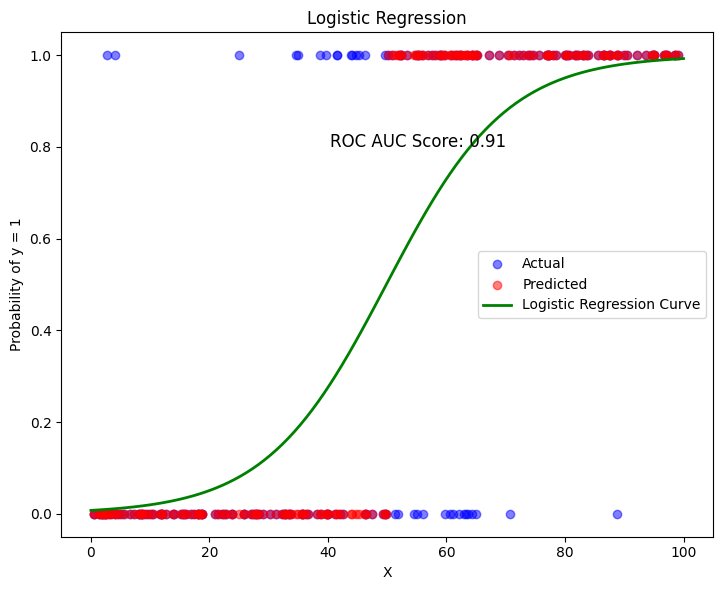

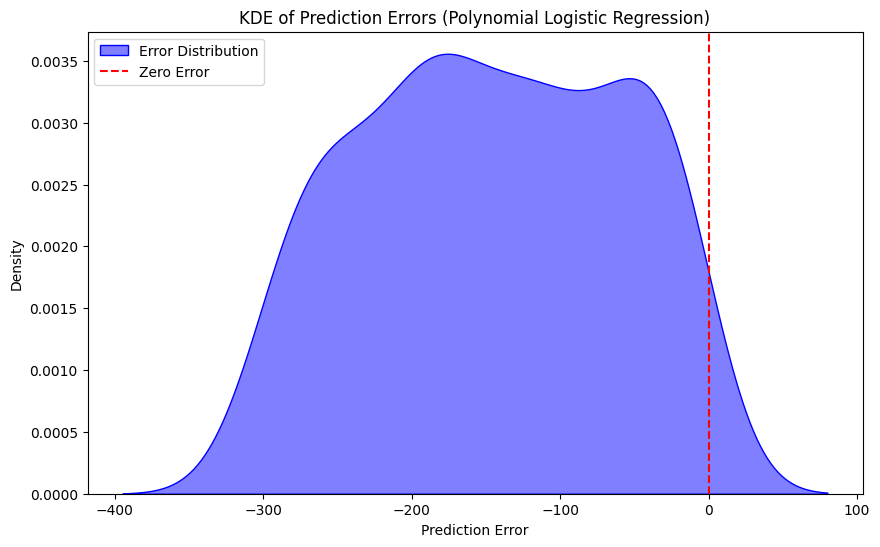

In [ ]:
# Plotting the results for logistic regression
plt.figure(figsize=(14, 6))

# Scatter plot for actual vs predicted values
plt.subplot(1, 2, 1)  # Create a subplot for logistic regression
plt.scatter(X_test, y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.5)

# Create a range of values for X to plot the logistic curve
X_range = np.linspace(0, 100, 100).reshape(-1, 1)
y_proba_range = logistic_model.predict_proba(X_range)[:, 1]

plt.plot(X_range, y_proba_range, color='green', linewidth=2, label='Logistic Regression Curve')
plt.title('Logistic Regression')
plt.xlabel('X')
plt.ylabel('Probability of y = 1')
plt.legend()

# Adding metrics to the lower-right corner of the logistic regression plot
plt.text(70, 0.8, f'ROC AUC Score: {roc_auc:.2f}', fontsize=12, color='black', ha='right')

plt.tight_layout()
plt.show()

# visualize the distribution of prediction errors using KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test - y_poly_pred, color='blue', fill=True, label='Error Distribution', alpha=0.5)
plt.title('KDE of Prediction Errors (Polynomial Logistic Regression)')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.legend()
plt.show()


# D). Count Data Regression

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import glm
import seaborn as sns
import matplotlib.pyplot as plt

# Sample Data
np.random.seed(42)
data = {
    'count': np.random.poisson(lam=5, size=100),  # Simulated count data
    'explanatory_variable1': np.random.randint(1, 10, size=100),  # Random integers
    'explanatory_variable2': np.random.rand(100) * 10  # Random float numbers
}

df = pd.DataFrame(data)
df

,count,explanatory_variable1,explanatory_variable2
0,5,3,7.228961
1,4,3,8.208615
2,4,2,7.184573
3,5,3,5.350367
4,5,3,4.766195
...,...,...,...
95,6,4,7.718820
96,8,6,0.122031
97,6,6,5.984427
98,2,1,5.655083


### 1. ** Count Data Models**

Poisson regression and Negative Binomial regression are two commonly employed techniques. These models are designed to handle non-negative integer-valued outcomes. Specifically, Poisson regression assumes the mean of the outcome is equal to its variance (equidispersion), while Negative Binomial regression accommodates overdispersion, where the variance exceeds the mean.

### 2. **Poisson Regression Analysis**

- **Model Assumption**: Poisson regression assumes that the dependent variable follows a Poisson distribution, where the variance equals the mean. The model is appropriate when the count data exhibits no overdispersion.
  
- **Model Specification**: In Poisson regression, the log of the expected count $\lambda$ is modeled as a linear combination of the predictor variables:
  
  $$
  \log(\lambda_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i}
  $$
  
  Here, $\lambda_i$ represents the expected count for the $i$-th observation, and $X_{1i}$ and $X_{2i}$ represent the explanatory variables. The coefficients $\beta_1$ and $\beta_2$ quantify the influence of these predictors on the log-transformed expected count.

- **Model Results**: After fitting the model, the output provides estimates of the regression coefficients, their standard errors, $z$-values, and associated $p$-values. These values allow for hypothesis testing, where significant coefficients indicate predictors that are statistically significant in influencing the count response.

  - **Interpretation of Coefficients**: For each unit increase in $X_1$, the expected count increases multiplicatively by $\exp(\beta_1)$. Similarly, a unit change in $X_2$ results in a multiplicative effect of $\exp(\beta_2) $ on the expected count.

In [ ]:
# Poisson Regression
poisson_model = glm('count ~ explanatory_variable1 + explanatory_variable2', data=df, family=sm.families.Poisson()).fit()
print("Poisson Regression Results:")
print(poisson_model.summary())

Poisson Regression Results:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -223.58
Date:                Wed, 09 Oct 2024   Deviance:                       112.21
Time:                        20:51:28   Pearson chi2:                     109.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02640
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
In

The Poisson regression analysis indicates a significant intercept value of

$$
\beta_0 = 1.5546 \quad (p < 0.001)
$$

suggesting a positive expected count when all explanatory variables are zero. However, neither of the explanatory variables demonstrates statistical significance at the 0.05 level. Specifically,

$$
\text{explanatory_variable1} \quad (\beta_1 = 0.0251, \quad p = 0.157)
$$

has a positive coefficient, indicating a slight increase in the count, but this effect is not statistically significant. Conversely,

$$
\text{explanatory_variable2} \quad (\beta_2 = -0.0165, \quad p = 0.345)
$$

reveals a negative relationship with the count, yet this, too, lacks statistical significance. The model’s pseudo $R^2$ value of

$$
0.02640
$$

implies that the explanatory variables account for a minimal portion of the variance in the count data, indicating potential limitations in model specification or the need for additional predictors.


### 3. **Negative Binomial Regression Analysis**

- **Model Assumption**: The Negative Binomial regression relaxes the restrictive assumption of equidispersion by introducing an overdispersion parameter $\alpha$. This parameter accounts for the scenario where the variance exceeds the mean (overdispersion), which is common in many real-world count datasets.

- **Model Specification**: The log of the expected count $\mu$ in the Negative Binomial model follows a similar linear relationship as Poisson regression:
  
  $$
  \log(\mu_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i}
  $$

  However, the Negative Binomial model incorporates an overdispersion term, which allows the variance to be greater than the mean. Specifically, the variance is modeled as:
  
  $$
  \text{Var}(Y_i) = \mu_i + \alpha \mu_i^2
  $$
  
  Here, $\alpha$ is the overdispersion parameter, and when $\alpha = 0$, the model reduces to Poisson.

- **Model Results**: The output for the Negative Binomial regression includes coefficient estimates, $z$-values, and $p$-values, similar to Poisson regression. However, the overdispersion parameter $\alpha$ is also estimated, providing insight into the extent of variance inflation beyond what is explained by the Poisson model.

In [ ]:
# Negative Binomial Regression
negbinom_model = sm.GLM(df['count'], sm.add_constant(df[['explanatory_variable1', 'explanatory_variable2']]), family=sm.families.NegativeBinomial()).fit()
print("\nNegative Binomial Regression Results:")
print(negbinom_model.summary())


Negative Binomial Regression Results:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -268.99
Date:                Wed, 09 Oct 2024   Deviance:                       20.388
Time:                        20:51:28   Pearson chi2:                     18.2
No. Iterations:                     5   Pseudo R-squ. (CS):           0.004827
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


The Negative Binomial regression analysis yields a significant intercept coefficient of

$$
\beta_0 = 1.5465 \quad (p < 0.001)
$$

indicating a positive expected count when the explanatory variables are zero. However, both explanatory variables show no statistical significance. Specifically,

$$
\text{explanatory_variable1} \quad (\beta_1 = 0.0273, \quad p = 0.527)
$$

exhibits a small positive effect on the count, but it is not statistically significant. Similarly,

$$
\text{explanatory_variable2} \quad (\beta_2 = -0.0172, \quad p = 0.689)
$$

displays a negative relationship with the count, which is also not statistically significant. The model’s pseudo \( R^2 \) value of

$$
0.004827
$$

suggests that the explanatory variables account for an insignificant portion of the variance in the count data, indicating potential inadequacies in model specification or the necessity for additional predictors.


## Predictions

In [ ]:
# Predictions
df['poisson_pred'] = poisson_model.predict()
df['negbinom_pred'] = negbinom_model.predict()

In [ ]:
df['poisson_pred']

,poisson_pred
0,4.529145
1,4.456459
2,4.420072
3,4.671861
4,4.717150
...,...
95,4.606892
96,5.491669
97,4.984917
98,4.420730


In [ ]:
df['negbinom_pred']

,negbinom_pred
0,4.501468
1,4.426401
2,4.383489
3,4.648997
4,4.695851
...,...
95,4.587408
96,5.519916
97,4.991462
98,4.378822


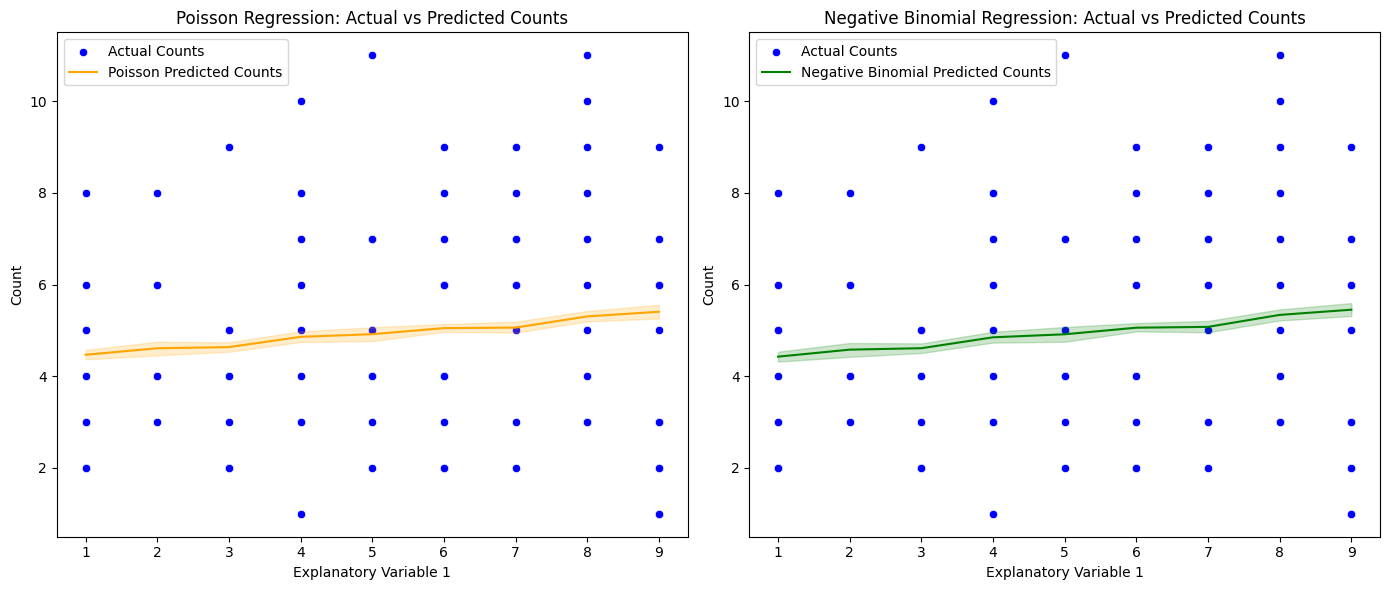

In [ ]:
# Visualization of Actual vs Predicted Counts
plt.figure(figsize=(14, 6))

# Poisson Regression Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='explanatory_variable1', y='count', data=df, color='blue', label='Actual Counts')
sns.lineplot(x='explanatory_variable1', y='poisson_pred', data=df, color='orange', label='Poisson Predicted Counts')
plt.title('Poisson Regression: Actual vs Predicted Counts')
plt.xlabel('Explanatory Variable 1')
plt.ylabel('Count')
plt.legend()

# Negative Binomial Regression Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x='explanatory_variable1', y='count', data=df, color='blue', label='Actual Counts')
sns.lineplot(x='explanatory_variable1', y='negbinom_pred', data=df, color='green', label='Negative Binomial Predicted Counts')
plt.title('Negative Binomial Regression: Actual vs Predicted Counts')
plt.xlabel('Explanatory Variable 1')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()

# Support Vector Regression

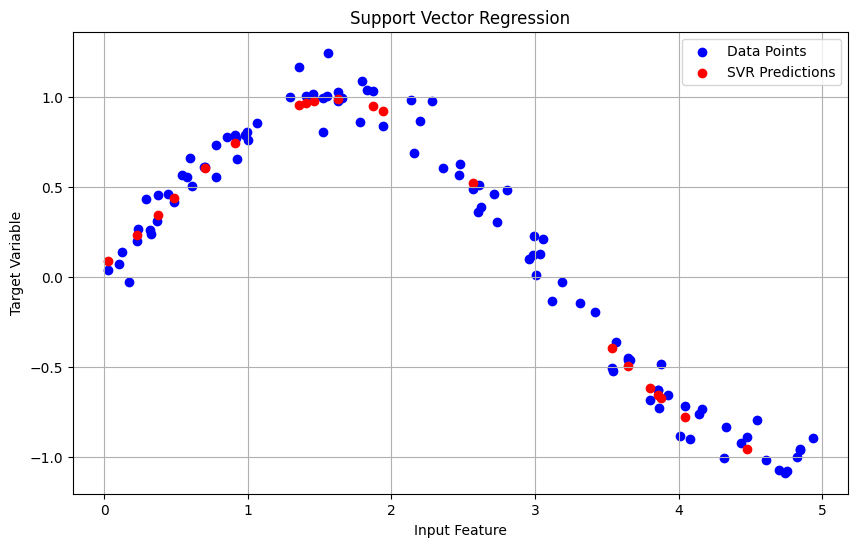

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Create sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # 100 data points between 0 and 5
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sinusoidal data with noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # Reshape for scaling

# Fit the Support Vector Regression model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)

# Make predictions
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Inverse scaling

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X_test, y_pred, color='red', label='SVR Predictions')
plt.title('Support Vector Regression')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()


# Tree Based Regression
## a) Decision Tree Regression

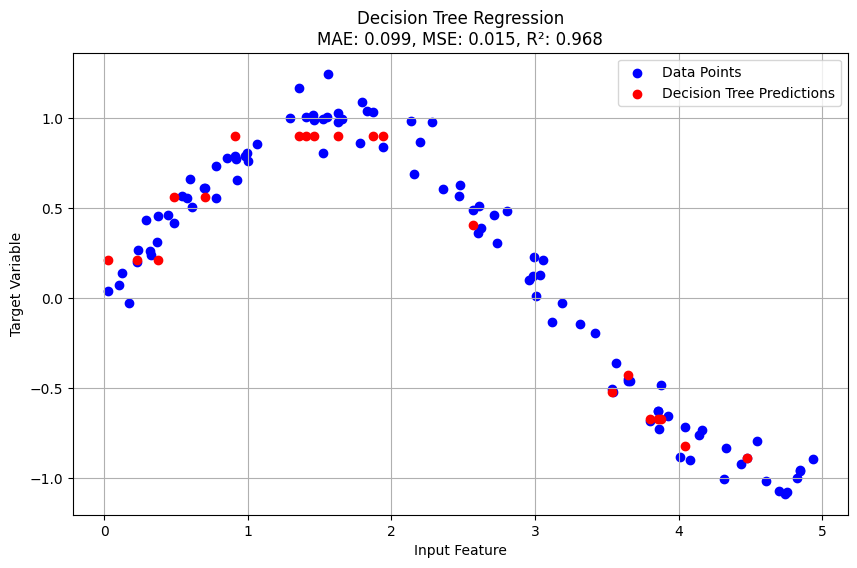

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Regression
decision_tree_model = DecisionTreeRegressor(max_depth=4)
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluation Metrics
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X_test, y_pred_tree, color='red', label='Decision Tree Predictions')
plt.title(f'Decision Tree Regression\nMAE: {mae_tree:.3f}, MSE: {mse_tree:.3f}, R²: {r2_tree:.3f}')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()


# c) Random Forest Regression

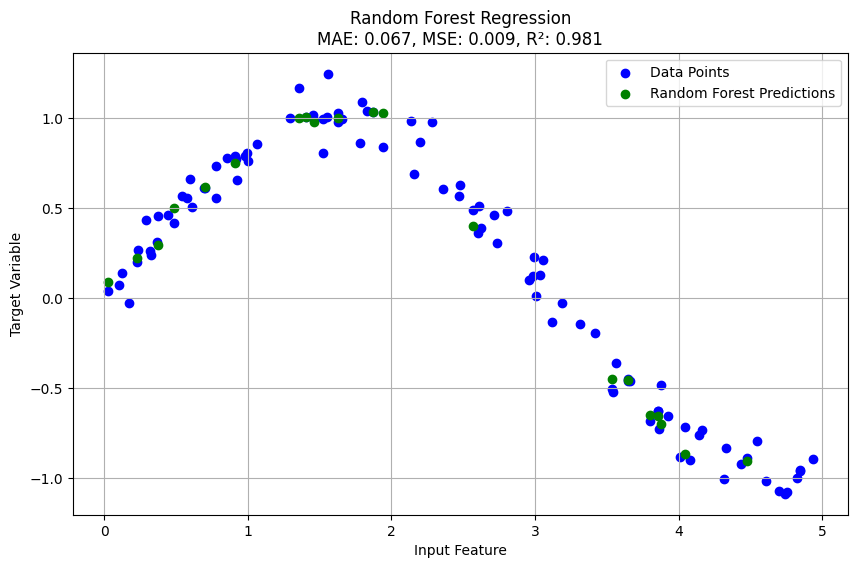

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

# Evaluation Metrics
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X_test, y_pred_forest, color='green', label='Random Forest Predictions')
plt.title(f'Random Forest Regression\nMAE: {mae_forest:.3f}, MSE: {mse_forest:.3f}, R²: {r2_forest:.3f}')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()


## b) Random Forest Regression

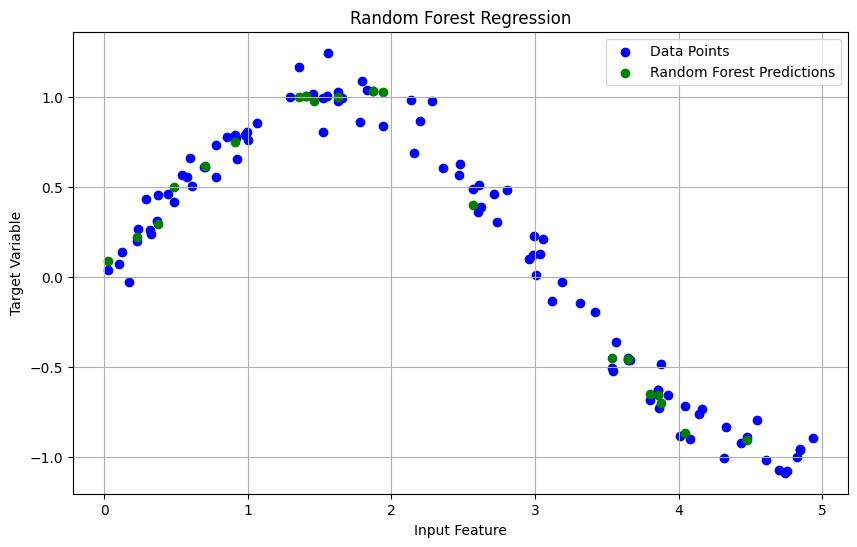

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Fit the Random Forest Regression model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_forest = random_forest_model.predict(X_test)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X_test, y_pred_forest, color='green', label='Random Forest Predictions')
plt.title('Random Forest Regression')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()


## d) Gradient Boosting Regression (Using XGBoost)

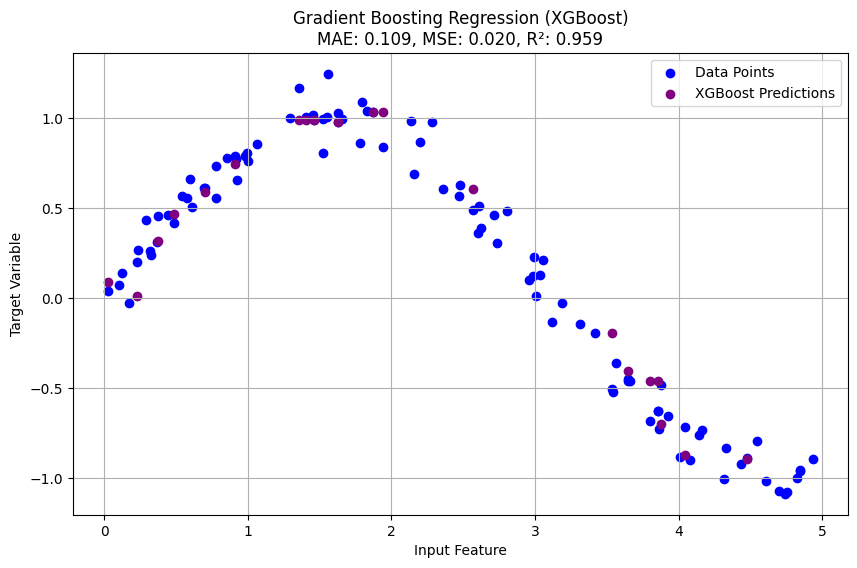

In [ ]:
import xgboost as xgb

# Gradient Boosting Regression (Using XGBoost)
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X_test, y_pred_xgb, color='purple', label='XGBoost Predictions')
plt.title(f'Gradient Boosting Regression (XGBoost)\nMAE: {mae_xgb:.3f}, MSE: {mse_xgb:.3f}, R²: {r2_xgb:.3f}')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()


##d). Gradient Boosting Regression (Using LightGBM)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 80, number of used features: 1
[LightGBM] [Info] Start training from score 0.152310
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

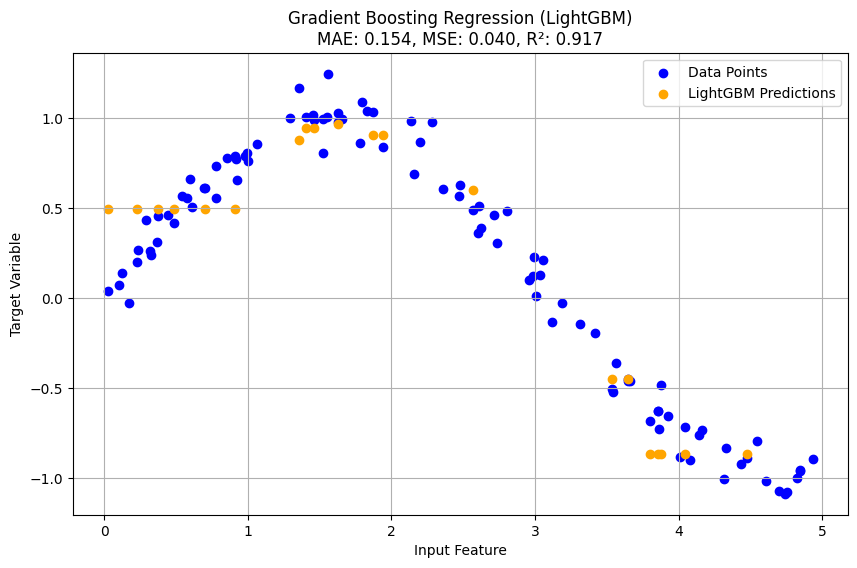

In [ ]:
import lightgbm as lgb

# Gradient Boosting Regression (Using LightGBM)
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation Metrics
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.scatter(X_test, y_pred_lgb, color='orange', label='LightGBM Predictions')
plt.title(f'Gradient Boosting Regression (LightGBM)\nMAE: {mae_lgb:.3f}, MSE: {mse_lgb:.3f}, R²: {r2_lgb:.3f}')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()


# e) Quantile Regression

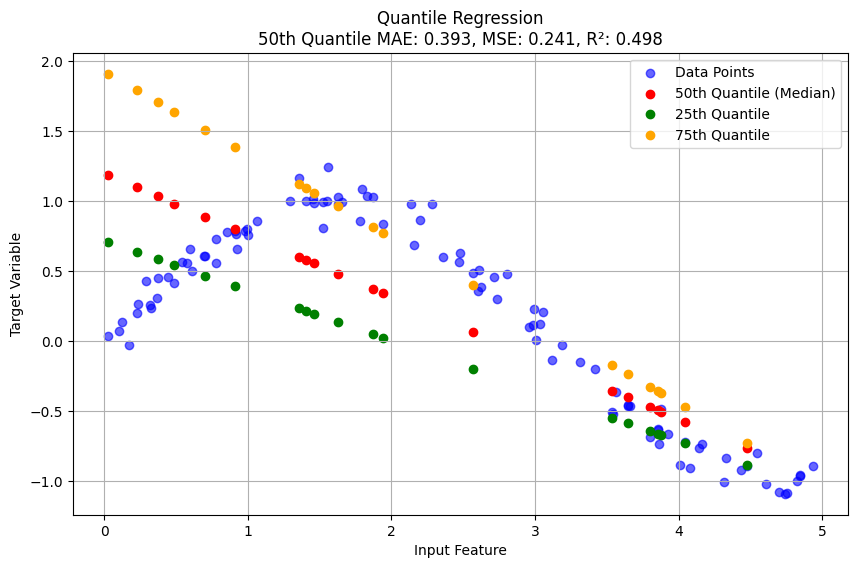

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant for statsmodels
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit Quantile Regression Model for the 50th quantile (median)
quantile_model_50 = sm.QuantReg(y_train, X_train_const).fit(q=0.5)
y_pred_50 = quantile_model_50.predict(X_test_const)

# Fit Quantile Regression Model for the 25th quantile
quantile_model_25 = sm.QuantReg(y_train, X_train_const).fit(q=0.25)
y_pred_25 = quantile_model_25.predict(X_test_const)

# Fit Quantile Regression Model for the 75th quantile
quantile_model_75 = sm.QuantReg(y_train, X_train_const).fit(q=0.75)
y_pred_75 = quantile_model_75.predict(X_test_const)

# Evaluation Metrics
mae_50 = mean_absolute_error(y_test, y_pred_50)
mse_50 = mean_squared_error(y_test, y_pred_50)
r2_50 = r2_score(y_test, y_pred_50)

mae_25 = mean_absolute_error(y_test, y_pred_25)
mse_25 = mean_squared_error(y_test, y_pred_25)
r2_25 = r2_score(y_test, y_pred_25)

mae_75 = mean_absolute_error(y_test, y_pred_75)
mse_75 = mean_squared_error(y_test, y_pred_75)
r2_75 = r2_score(y_test, y_pred_75)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points', alpha=0.6)
plt.scatter(X_test, y_pred_50, color='red', label='50th Quantile (Median)')
plt.scatter(X_test, y_pred_25, color='green', label='25th Quantile')
plt.scatter(X_test, y_pred_75, color='orange', label='75th Quantile')
plt.title('Quantile Regression\n50th Quantile MAE: {:.3f}, MSE: {:.3f}, R²: {:.3f}'.format(mae_50, mse_50, r2_50))
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()


# Time Series Regression

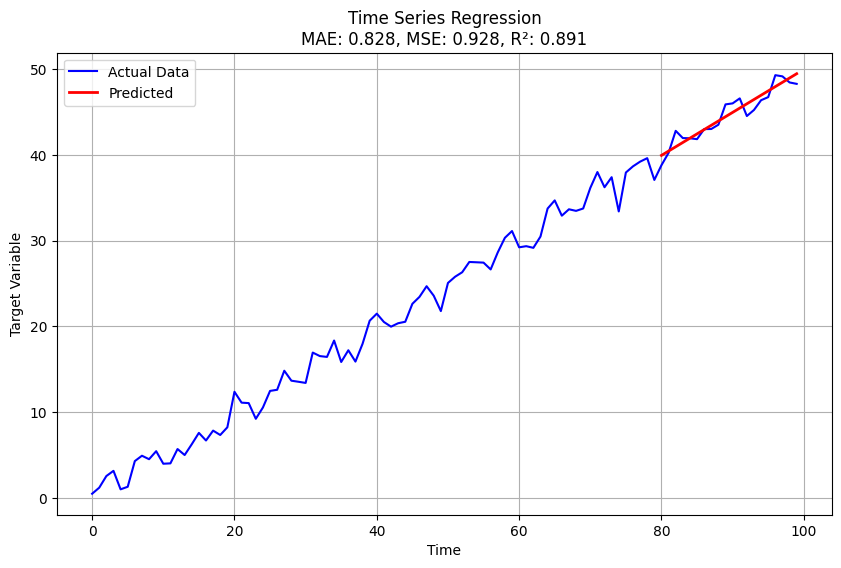

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate synthetic time series data
np.random.seed(42)
time = np.arange(100)
y = 0.5 * time + np.sin(time) + np.random.normal(size=time.shape)

# Create a DataFrame
data = pd.DataFrame({'Time': time, 'Target': y})

# Train-test split (80-20 split)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit Time Series Regression Model
X_train = sm.add_constant(train['Time'])
y_train = train['Target']
model = sm.OLS(y_train, X_train).fit()

# Make predictions
X_test = sm.add_constant(test['Time'])
y_pred = model.predict(X_test)

# Evaluation Metrics
mae_ts = mean_absolute_error(test['Target'], y_pred)
mse_ts = mean_squared_error(test['Target'], y_pred)
r2_ts = r2_score(test['Target'], y_pred)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(data['Time'], data['Target'], label='Actual Data', color='blue')
plt.plot(test['Time'], y_pred, label='Predicted', color='red', linewidth=2)
plt.title('Time Series Regression\nMAE: {:.3f}, MSE: {:.3f}, R²: {:.3f}'.format(mae_ts, mse_ts, r2_ts))
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.legend()
plt.grid()
plt.show()


# Generalized Linear Models (GLM)

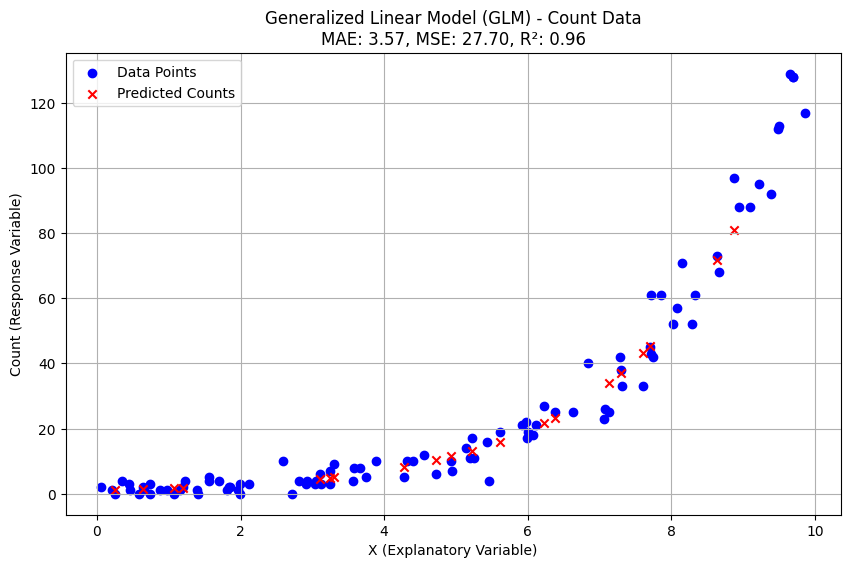

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Generate synthetic count data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Explanatory variable
y = np.random.poisson(lam=np.exp(0.5 * X.flatten()))  # Count response variable

# Create DataFrame
data_glm = pd.DataFrame({'X': X.flatten(), 'Count': y})

# Step 2: Train-test split (80-20 split)
train_size = int(len(data_glm) * 0.8)
train_glm, test_glm = data_glm[:train_size], data_glm[train_size:]

# Fit Generalized Linear Model (Poisson)
model_glm = sm.GLM(train_glm['Count'], sm.add_constant(train_glm['X']), family=sm.families.Poisson()).fit()

# Step 3: Make predictions
y_pred_glm = model_glm.predict(sm.add_constant(test_glm['X']))

# Step 4: Evaluation Metrics
mae_glm = mean_absolute_error(test_glm['Count'], y_pred_glm)
mse_glm = mean_squared_error(test_glm['Count'], y_pred_glm)
r2_glm = r2_score(test_glm['Count'], y_pred_glm)

# Visualization of actual vs predicted counts
plt.figure(figsize=(10, 6))
plt.scatter(data_glm['X'], data_glm['Count'], color='blue', label='Data Points')
plt.scatter(test_glm['X'], y_pred_glm, color='red', label='Predicted Counts', marker='x')
plt.title('Generalized Linear Model (GLM) - Count Data\nMAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}'.format(mae_glm, mse_glm, r2_glm))
plt.xlabel('X (Explanatory Variable)')
plt.ylabel('Count (Response Variable)')
plt.legend()
plt.grid()
plt.show()


# Non-parametric Regression

## a) Kernel Regression

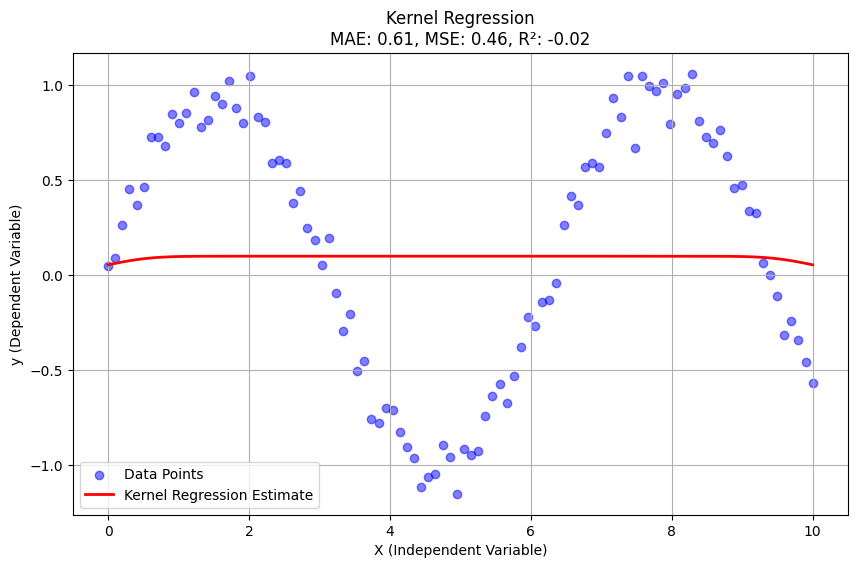

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)[:, np.newaxis]  # Independent variable
y = np.sin(X).ravel() + np.random.normal(scale=0.1, size=X.shape[0])  # Dependent variable with noise

# Create DataFrame
data_kernel = pd.DataFrame({'X': X.ravel(), 'y': y})

# Step 2: Fit Kernel Regression
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(X, y)

# Step 3: Make predictions
X_test = np.linspace(0, 10, 1000)[:, np.newaxis]
log_density = kde.score_samples(X_test)  # Log density
y_pred_kernel = np.exp(log_density)  # Convert log density to actual density

# Step 4: Evaluation Metrics
mae_kernel = mean_absolute_error(y, y_pred_kernel[:100])  # Compare with the original y
mse_kernel = mean_squared_error(y, y_pred_kernel[:100])
r2_kernel = r2_score(y, y_pred_kernel[:100])

# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(data_kernel['X'], data_kernel['y'], color='blue', label='Data Points', alpha=0.5)
plt.plot(X_test, y_pred_kernel, color='red', label='Kernel Regression Estimate', linewidth=2)
plt.title('Kernel Regression\nMAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}'.format(mae_kernel, mse_kernel, r2_kernel))
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.grid()
plt.show()



## b) Local Regression (LOESS/LOWESS)

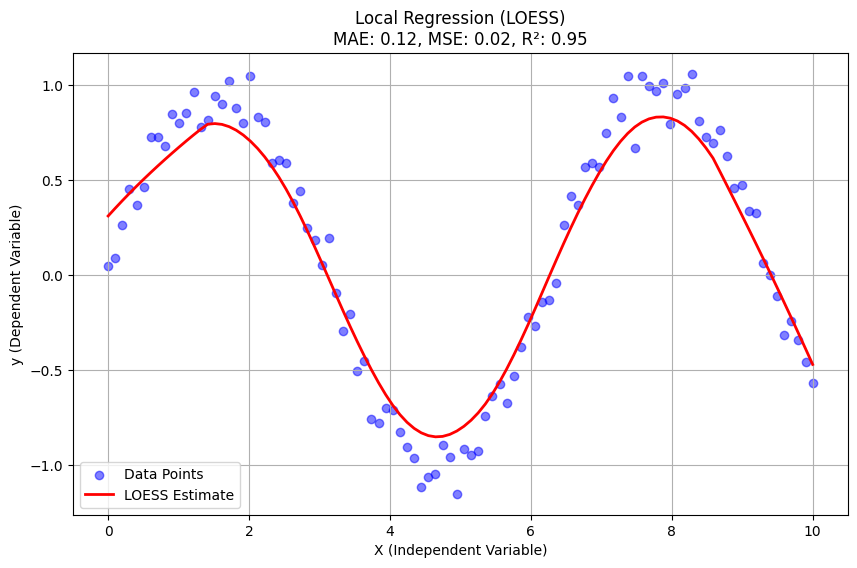

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 100)  # Independent variable
y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape)  # Dependent variable with noise

# Create DataFrame
data_loess = pd.DataFrame({'X': X, 'y': y})

# Step 2: Fit LOESS regression
lowess = sm.nonparametric.lowess(data_loess['y'], data_loess['X'], frac=0.3)  # frac controls the bandwidth

# Step 3: Make predictions
X_loess = lowess[:, 0]  # X values
y_pred_loess = lowess[:, 1]  # Predicted y values

# Step 4: Evaluation Metrics
mae_loess = mean_absolute_error(data_loess['y'], y_pred_loess)
mse_loess = mean_squared_error(data_loess['y'], y_pred_loess)
r2_loess = r2_score(data_loess['y'], y_pred_loess)

# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(data_loess['X'], data_loess['y'], color='blue', label='Data Points', alpha=0.5)
plt.plot(X_loess, y_pred_loess, color='red', label='LOESS Estimate', linewidth=2)
plt.title('Local Regression (LOESS)\nMAE: {:.2f}, MSE: {:.2f}, R²: {:.2f}'.format(mae_loess, mse_loess, r2_loess))
plt.xlabel('X (Independent Variable)')
plt.ylabel('y (Dependent Variable)')
plt.legend()
plt.grid()
plt.show()


# Robust Regression

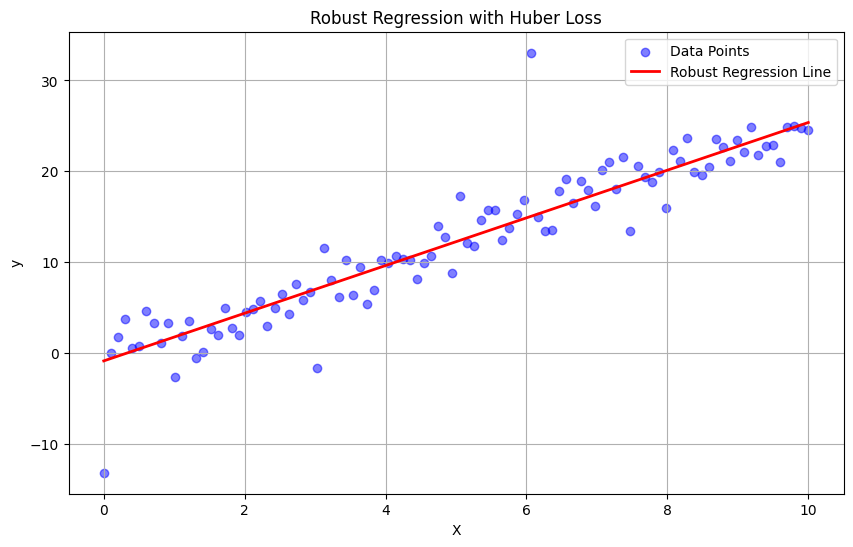

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       98
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 09 Oct 2024                                         
Time:                        20:51:36                                         
No. Iterations:                    16                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8557      0.412     -2.075      0.0

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

# Step 1: Generate synthetic data with outliers
np.random.seed(42)
X = np.linspace(0, 10, 100)
y = 2.5 * X + np.random.normal(scale=2.0, size=X.shape)

# Introduce outliers
y[::10] += np.random.normal(scale=10, size=y[::10].shape)

# Create a DataFrame
data = pd.DataFrame({'X': X, 'y': y})

# Step 2: Fit a robust regression model (Huber)
X_with_const = sm.add_constant(data['X'])  # Add constant term for intercept
model = RLM(data['y'], X_with_const, M=sm.robust.norms.HuberT())
results = model.fit()

# Step 3: Predictions
predictions = results.predict(X_with_const)

# Step 4: Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['y'], color='blue', alpha=0.5, label='Data Points')
plt.plot(data['X'], predictions, color='red', label='Robust Regression Line', linewidth=2)
plt.title('Robust Regression with Huber Loss')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Step 5: Print summary of the regression results
print(results.summary())


#Robust Regression

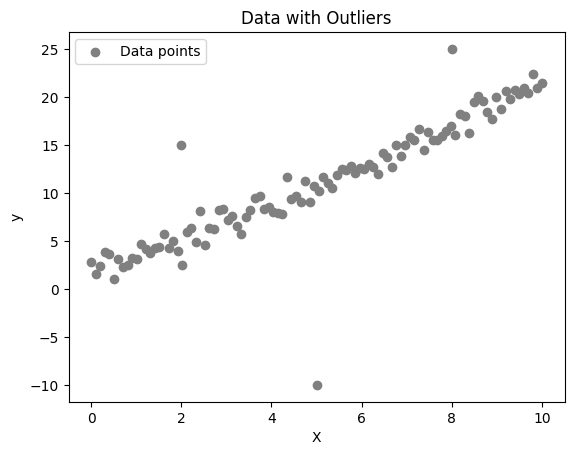

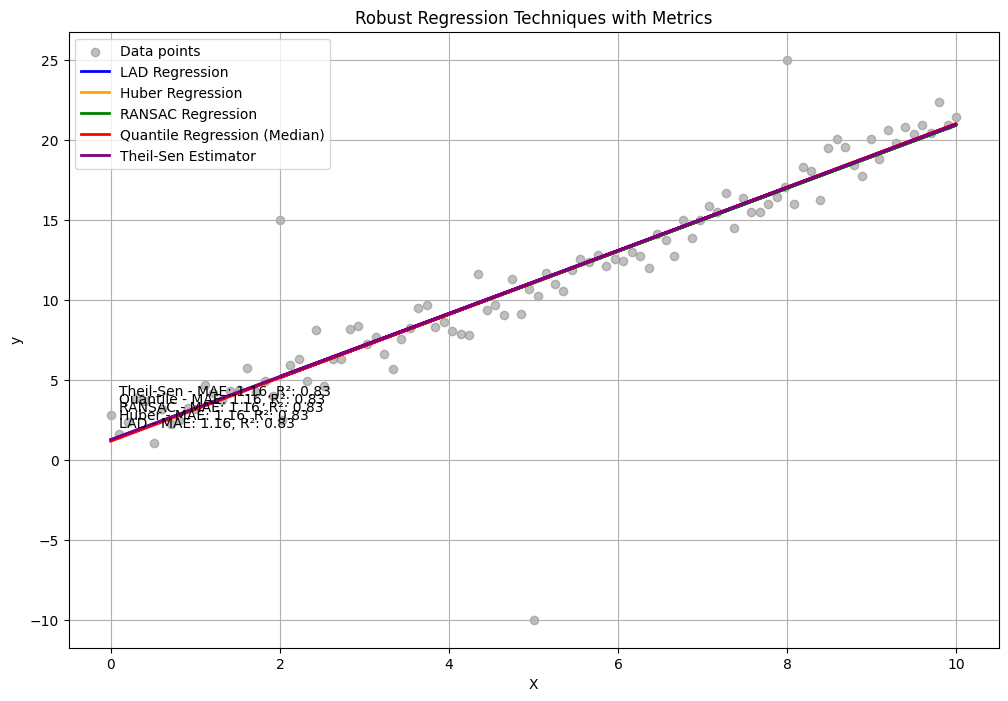

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression, HuberRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from statsmodels.robust.robust_linear_model import RLM

# Create synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.normal(0, 1, 100)

# Add outliers
X_outliers = np.array([2, 5, 8])
y_outliers = np.array([15, -10, 25])
X = np.concatenate([X, X_outliers])
y = np.concatenate([y, y_outliers])

# Reshape for sklearn
X = X.reshape(-1, 1)

# Plotting the data
plt.scatter(X, y, color='gray', label='Data points')
plt.title('Data with Outliers')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# 1. Least Absolute Deviations (LAD) Regression
model_lad = RLM(y, sm.add_constant(X)).fit()
y_lad = model_lad.predict(sm.add_constant(X))

# 2. Huber Regression
model_huber = HuberRegressor().fit(X, y)
y_huber = model_huber.predict(X)

# 3. RANSAC
base_model = LinearRegression()
model_ransac = RANSACRegressor(base_model).fit(X, y)
y_ransac = model_ransac.predict(X)

# 4. Quantile Regression (Median)
quantile_model = QuantReg(y, sm.add_constant(X)).fit(q=0.5)
y_quantile = quantile_model.predict(sm.add_constant(X))

# 5. Theil–Sen Estimator (Manual Calculation)
def theil_sen(X, y):
    n = len(X)
    slopes = []
    for i in range(n):
        for j in range(i + 1, n):
            if X[i] != X[j]:  # Avoid division by zero
                slopes.append((y[j] - y[i]) / (X[j] - X[i]))
    return np.median(slopes)

# Calculate Theil-Sen Slope
slope = theil_sen(X.flatten(), y)
intercept = np.median(y - slope * X.flatten())
y_theil_sen = intercept + slope * X.flatten()

# Metrics calculation
metrics = {
    "LAD": {
        "MAE": mean_absolute_error(y, y_lad),
        "R2": r2_score(y, y_lad),
    },
    "Huber": {
        "MAE": mean_absolute_error(y, y_huber),
        "R2": r2_score(y, y_huber),
    },
    "RANSAC": {
        "MAE": mean_absolute_error(y, y_ransac),
        "R2": r2_score(y, y_ransac),
    },
    "Quantile": {
        "MAE": mean_absolute_error(y, y_quantile),
        "R2": r2_score(y, y_quantile),
    },
    "Theil-Sen": {
        "MAE": mean_absolute_error(y, y_theil_sen),
        "R2": r2_score(y, y_theil_sen),
    },
}

# Plotting the results
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='gray', label='Data points', alpha=0.5)
plt.plot(X, y_lad, color='blue', label='LAD Regression', linewidth=2)
plt.plot(X, y_huber, color='orange', label='Huber Regression', linewidth=2)
plt.plot(X, y_ransac, color='green', label='RANSAC Regression', linewidth=2)
plt.plot(X, y_quantile, color='red', label='Quantile Regression (Median)', linewidth=2)
plt.plot(X, y_theil_sen, color='purple', label='Theil-Sen Estimator', linewidth=2)

# Add metrics to the plot
for i, (method, values) in enumerate(metrics.items()):
    plt.text(0.1, 2 + i * 0.5, f"{method} - MAE: {values['MAE']:.2f}, R²: {values['R2']:.2f}",
             fontsize=10, color='black')

plt.title('Robust Regression Techniques with Metrics')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


# Hierarchical Linear Models (HLM)

Hierarchical Linear Model Summary:
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y        
No. Observations: 200     Method:             REML     
No. Groups:       10      Scale:              0.9199   
Min. group size:  20      Log-Likelihood:     -292.9142
Max. group size:  20      Converged:          Yes      
Mean group size:  20.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.601    0.358  1.677 0.094 -0.101  1.303
X             2.019    0.071 28.480 0.000  1.880  2.158
Group Var     1.238    0.646                           



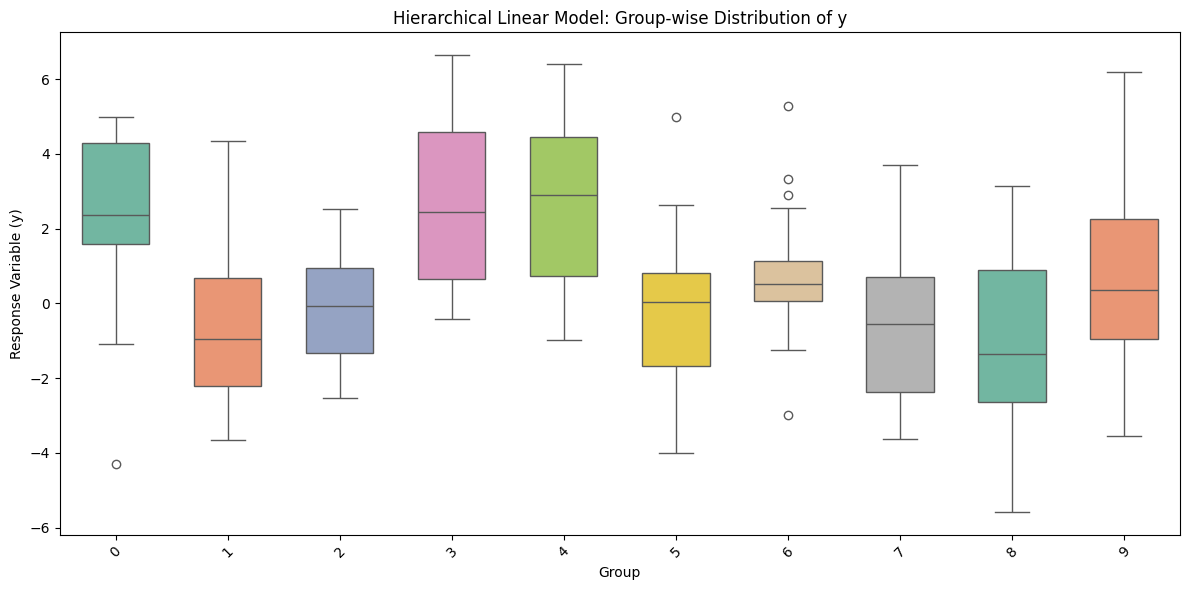

In [ ]:
# ------------------------------------------
# 1. Hierarchical Linear Models (HLM)
# ------------------------------------------

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.mixed_linear_model import MixedLM

# Set random seed for reproducibility
np.random.seed(0)

# Define parameters for simulation
n_groups = 10  # Number of groups
n_per_group = 20  # Number of observations per group

# Generate random effects for each group
group_effects = np.random.normal(0, 1, n_groups)

# Simulate predictor variable X and response variable y
X = np.random.normal(0, 1, n_groups * n_per_group)  # Predictor variable
groups = np.repeat(np.arange(n_groups), n_per_group)  # Group identifiers
y = 2 * X + group_effects[groups] + np.random.normal(0, 1, n_groups * n_per_group)  # Response variable

# Create a DataFrame to hold the data
data = pd.DataFrame({'X': X, 'y': y, 'group': groups})

# Fit the Hierarchical Linear Model
model_hlm = MixedLM.from_formula('y ~ X', data=data, groups=data['group'])
result_hlm = model_hlm.fit()

# Print the summary of the fitted model
print("Hierarchical Linear Model Summary:")
print(result_hlm.summary())

# Visualization for Hierarchical Linear Model: Group-wise Distribution of y
plt.figure(figsize=(12, 6))

# Boxplot for group-wise distribution of y
sns.boxplot(x='group', y='y', data=data, palette="Set2", width=0.6)
plt.title('Hierarchical Linear Model: Group-wise Distribution of y')
plt.xlabel('Group')
plt.ylabel('Response Variable (y)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


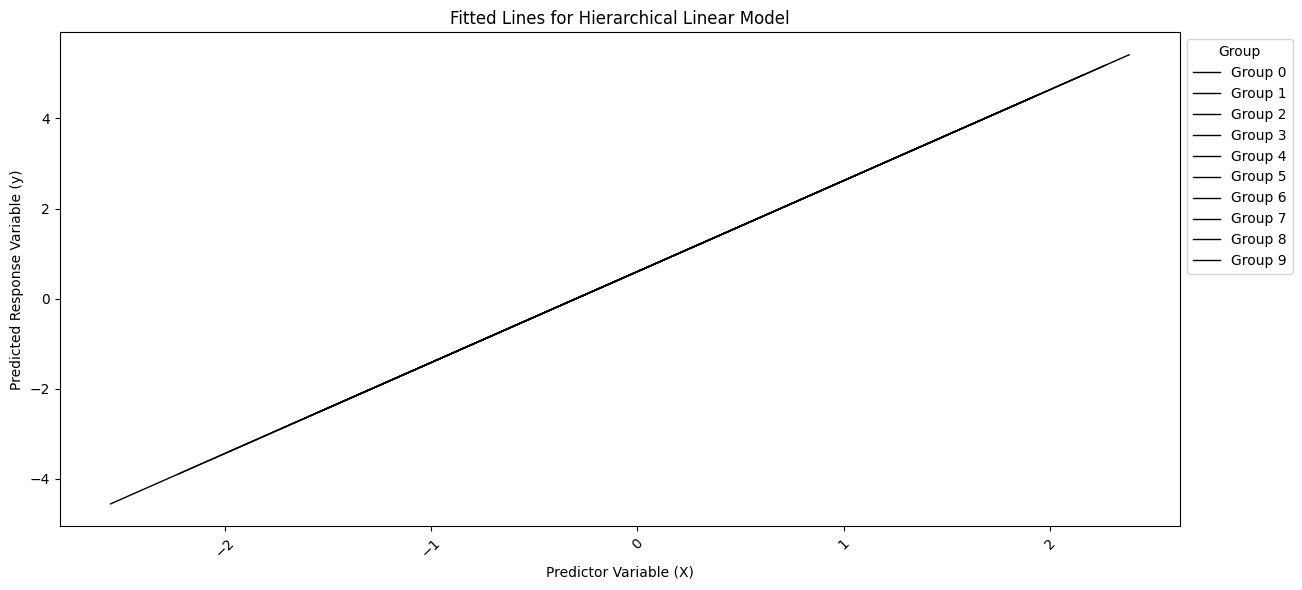

In [ ]:
# Visualization for fitted line curves
plt.figure(figsize=(12, 6))

# Calculate and plot the fitted line for each group
for group in data['group'].unique():
    group_data = data[data['group'] == group]
    sns.lineplot(x=group_data['X'],
                 y=result_hlm.predict(group_data),
                 color='black',
                 estimator=None,
                 label=f'Group {group}',
                 linewidth=1)

# Add plot details for fitted lines
plt.title('Fitted Lines for Hierarchical Linear Model')
plt.xlabel('Predictor Variable (X)')
plt.ylabel('Predicted Response Variable (y)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.legend(title='Group', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# b) Survival Regression (Cox Proportional Hazards)


In [ ]:
#!pip install lifelines


Cox Proportional Hazards Model Summary:


<lifelines.CoxPHFitter: fitted with 100 total observations, 31 right-censored observations>
             duration col = 'T'
                event col = 'E'
      baseline estimation = breslow
   number of observations = 100
number of events observed = 69
   partial log-likelihood = -244.72
         time fit was run = 2024-10-09 20:51:38 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
X1         0.22      1.25      0.12           -0.02            0.47                0.98                1.59
X2        -0.11      0.90      0.13           -0.36            0.15                0.69                1.16

           cmp to     z    p  -log2(p)
covariate                             
X1           0.00  1.78 0.08      3.73
X2           0.00 -0.83 0.41      1.29
---
Concordance = 0.58
Partial AIC = 493.44
log-likelihood ratio test = 3.71 on 2 df
-log2(p) of ll-ratio test = 2.67

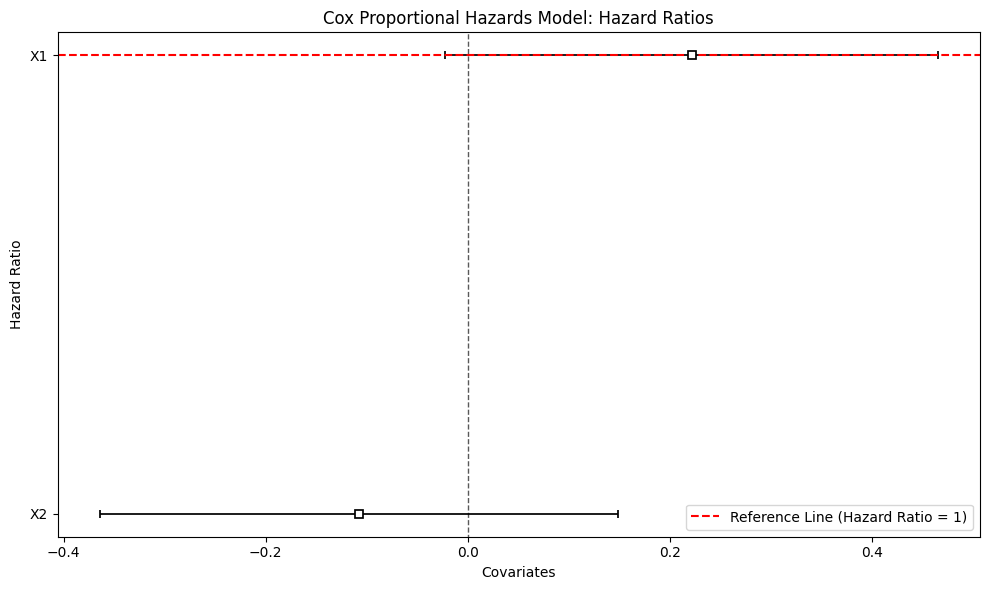

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

# Set random seed for reproducibility
np.random.seed(0)

# Define the number of samples
n = 100

# Simulate survival data
T = np.random.exponential(scale=10, size=n)  # Time until event (survival times)
E = np.random.binomial(1, 0.7, size=n)       # Censoring indicator (1 if event occurred)

# Simulate covariates
X1 = np.random.normal(size=n)
X2 = np.random.normal(size=n)

# Create DataFrame to hold survival data
survival_data = pd.DataFrame({
    'T': T,
    'E': E,
    'X1': X1,
    'X2': X2
})

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(survival_data, duration_col='T', event_col='E')

# Print summary of the model
print("\nCox Proportional Hazards Model Summary:")
cph.print_summary()  # Print detailed summary of the fitted model

# Visualization for Cox Proportional Hazards Model
plt.figure(figsize=(10, 6))
cph.plot()
plt.title('Cox Proportional Hazards Model: Hazard Ratios')
plt.xlabel('Covariates')
plt.ylabel('Hazard Ratio')
plt.axhline(y=1, color='red', linestyle='--', label='Reference Line (Hazard Ratio = 1)')  # Reference line
plt.legend()  # Add legend
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


Hierarchical Linear Model Summary:
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: y        
No. Observations: 200     Method:             REML     
No. Groups:       10      Scale:              0.9199   
Min. group size:  20      Log-Likelihood:     -292.9142
Max. group size:  20      Converged:          Yes      
Mean group size:  20.0                                 
-------------------------------------------------------
              Coef. Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     0.601    0.358  1.677 0.094 -0.101  1.303
X             2.019    0.071 28.480 0.000  1.880  2.158
Group Var     1.238    0.646                           



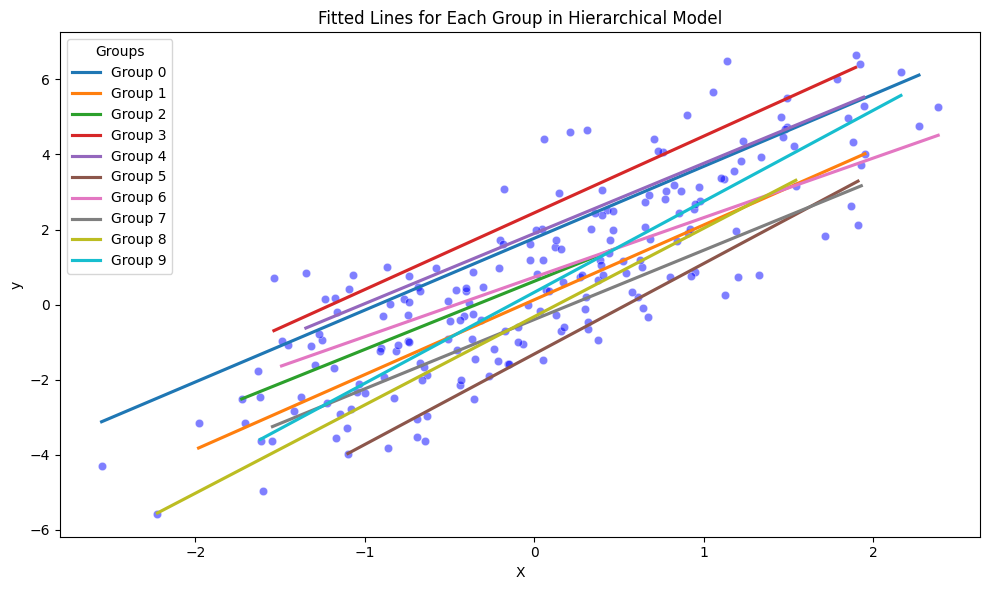

In [ ]:
# ------------------------------------------
# Multi-Level Models (Hierarchical Linear Models)
# ------------------------------------------

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.mixed_linear_model import MixedLM

# Set random seed for reproducibility
np.random.seed(0)

# Simulate hierarchical data
n_groups = 10
n_per_group = 20

# Random effects for groups
group_effects = np.random.normal(0, 1, n_groups)
X = np.random.normal(0, 1, n_groups * n_per_group)  # Predictor variable
groups = np.repeat(np.arange(n_groups), n_per_group)  # Group labels

# Response variable with group effects and noise
y = 2 * X + group_effects[groups] + np.random.normal(0, 1, n_groups * n_per_group)

# Create DataFrame
data = pd.DataFrame({'X': X, 'y': y, 'group': groups})

# Fit Hierarchical Linear Model
model_hlm = MixedLM.from_formula('y ~ X', data=data, groups=data['group'])
result_hlm = model_hlm.fit()

# Summary of the model
print("Hierarchical Linear Model Summary:")
print(result_hlm.summary())

# Additional visualization of fitted line curves for each group
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='y', data=data, color='blue', alpha=0.5)
for g in range(n_groups):
    group_data = data[data['group'] == g]
    # Fit a simple linear regression line for each group
    sns.regplot(x='X', y='y', data=group_data, ci=None, label=f'Group {g}', scatter=False)

plt.title('Fitted Lines for Each Group in Hierarchical Model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(title='Groups')
plt.tight_layout()
plt.show()


In [ ]:
#pip install --upgrade seaborn pandas

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


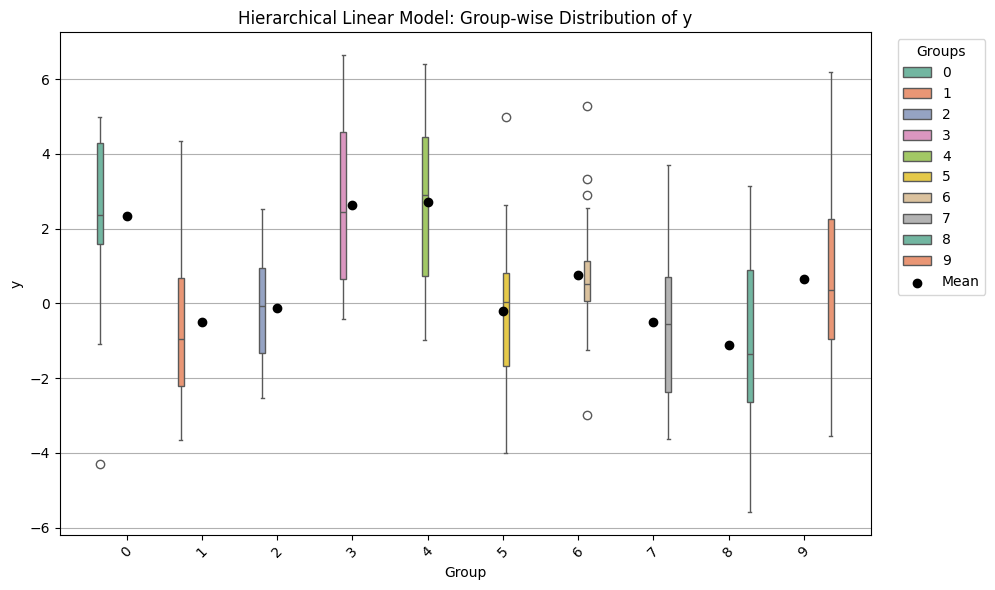

In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='y', data=data, hue='group', palette="Set2", dodge=True)

# Calculate means for each group and add them to the plot
mean_values = data.groupby('group')['y'].mean().reset_index()
plt.scatter(mean_values['group'], mean_values['y'], color='black', marker='o', label='Mean', zorder=5)

plt.title('Hierarchical Linear Model: Group-wise Distribution of y')
plt.xlabel('Group')
plt.ylabel('y')
plt.xticks(rotation=45)
plt.legend(title='Groups', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.grid(axis='y')  # Optional: Add gridlines
plt.show()
